In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches


# set dataframe display limits
pd.set_option('display.max_rows', 50) #does not show 50?
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 200)

###data cleaning

In [3]:
df = pd.read_csv('../data/_output.csv')

# reorder columns
columns = ['id', 'postalCode', 'province', 'locality', 'type of property', 'subtype of property', 'type of sale', 'state of the building', 'number of facades', 'number of bedrooms', 'fully equipped kitchen', 'furnished', 'open fire', 'terrace', 'garden', 'swimming pool', 'terrace area', 'garden area', 'living area', 'total property area', 'total land area', 'price']
df = df[columns]

# convert to desired type
    # for boolean:
        # contvert to string
        # with a lambda function, check if value is equal to 'True', 'true', or '1' and return True or False
        # convert to integer
df['id'] = df['id'].astype(int)
df['postalCode'] = df['postalCode'].astype(int)
df['province'] = df['province'].astype(str)
df['locality'] = df['locality'].astype(str)
df['type of property'] = df['type of property'].astype(str)
df['subtype of property'] = df['subtype of property'].astype(str)
df['type of sale'] = df['type of sale'].astype(str)
df['state of the building'] = df['state of the building'].astype(str)
df['number of facades'] = df['number of facades'].astype(int)
df['number of bedrooms'] = df['number of bedrooms'].astype(int)
df['fully equipped kitchen'] = df['fully equipped kitchen'].astype(str)
df['furnished'] = df['furnished'].astype(str).apply(lambda x: int(x.lower() == 'true' or x.lower() == '1'))
df['open fire'] = df['open fire'].astype(str).apply(lambda x: int(x.lower() == 'true' or x.lower() == '1'))
df['terrace'] = df['terrace'].astype(str).apply(lambda x: int(x.lower() == 'true' or x.lower() == '1'))
df['garden'] = df['garden'].astype(str).apply(lambda x: int(x.lower() == 'true' or x.lower() == '1'))
df['swimming pool'] = df['swimming pool'].astype(str).apply(lambda x: int(x.lower() == 'true' or x.lower() == '1'))
df['terrace area'] = df['terrace area'].astype(int)
df['garden area'] = df['garden area'].astype(int)
df['living area'] = df['living area'].astype(int)
df['total property area'] = df['total property area'].astype(int)
df['total land area'] = df['total land area'].astype(int)
df['price'] = df['price'].astype(int)

# drop duplicates
df = df.drop_duplicates()

for column in columns:
    # check if values are string
    if df[column].dtype == 'object':
         # remove leading and trailing spaces
        df[column] = df[column].str.strip()

# exclude rows where province is '0'
df = df[df['province'] != '0']

# exclude rows where total property area is '0'
df = df[df['total property area'] != 0]

# locate empty values
rows_with_missing_values = df.isna().any(axis=1)
count_rows_with_missing_values = rows_with_missing_values.sum()
print('Missing values: '+str(count_rows_with_missing_values))

#empty_values = df.isnull()
#empty_values_sum = empty_values.sum()
#print('empty values:\n'+str(empty_values_sum))


Missing values: 0


In [3]:
display(df)

,id,postalCode,province,locality,type of property,subtype of property,type of sale,state of the building,number of facades,number of bedrooms,fully equipped kitchen,furnished,open fire,terrace,garden,swimming pool,terrace area,garden area,living area,total property area,total land area,price
0,10679324,4100,Liège,Seraing,HOUSE,HOUSE,residential_sale,just_renovated,2,3,installed,0,0,1,1,0,64,106,14,87,145,159000
1,10679325,4600,Liège,Vise,HOUSE,HOUSE,residential_sale,good,3,3,installed,0,0,1,0,0,136,0,19,145,184,229000
2,10679351,1800,Flemish Brabant,Vilvoorde,HOUSE,VILLA,residential_sale,good,3,3,semi_equipped,0,0,1,1,0,40,400,17,132,623,430000
3,10679090,9700,East Flanders,Oudenaarde,HOUSE,HOUSE,residential_sale,as_new,4,2,hyper_equipped,0,0,1,1,0,25,420,21,161,680,439000
4,10678835,1700,Flemish Brabant,Dilbeek,HOUSE,HOUSE,residential_sale,to_renovate,3,4,installed,0,0,1,0,0,0,0,29,315,8002,529000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11989,10619309,7500,Hainaut,Tournai,APARTMENT,APARTMENT,residential_sale,good,2,2,installed,0,0,0,1,0,0,80,0,97,0,129000
11990,10588563,4100,Liège,Seraing,APARTMENT,APARTMENT,residential_sale,to_be_done_up,2,2,semi_equipped,0,0,1,0,0,8,0,0,73,0,134000
11991,9812376,7080,Hainaut,Frameries,APARTMENT,APARTMENT,residential_sale,0,2,1,0,0,1,0,0,0,0,0,0,251,0,135000
11992,10273588,3770,Limburg,Riemst,APARTMENT,APARTMENT,residential_sale,good,3,1,0,0,0,1,0,0,0,0,0,58,0,139000


In [4]:
display(df.describe())

,id,postalCode,number of facades,number of bedrooms,furnished,open fire,terrace,garden,swimming pool,terrace area,garden area,living area,total property area,total land area,price
count,1.169600e+04,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,11696.000000,1.169600e+04
mean,1.053273e+07,4668.182285,2.144066,2.989826,0.048478,0.339347,0.711782,0.369785,0.033772,12.821392,196.034713,19.977941,175.061132,660.655438,5.252765e+05
std,2.298328e+05,3183.850024,1.410467,1.672190,0.214783,0.473508,0.452953,0.482767,0.180650,28.929242,1671.788102,40.009676,134.776962,5741.552325,5.868783e+05
min,7.710166e+06,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,2.000000e+04
25%,1.050463e+07,1420.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.000000,0.000000,2.440000e+05
50%,1.060542e+07,4020.000000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17.000000,138.000000,0.000000,3.500000e+05
75%,1.065107e+07,8300.000000,3.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,15.000000,0.000000,34.000000,213.000000,451.250000,5.750000e+05
max,1.067986e+07,9992.000000,25.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,800.000000,87000.000000,3558.000000,1700.000000,500000.000000,1.100000e+07


In [5]:
# display count of properties per province
counts_per_province = df.groupby('province')['province'].value_counts()
display(counts_per_province)

# display average price per province
average_price_per_province = df.groupby('province')['price'].mean()
display(average_price_per_province)

province
Antwerp            1235
Brussels           2420
East Flanders      1290
Flemish Brabant    1151
Hainaut             704
Limburg             131
Liège              1174
Luxembourg          411
Namur               334
Walloon Brabant     679
West Flanders      2167
Name: count, dtype: int64

province
Antwerp            499480.177328
Brussels           695261.041322
East Flanders      405976.025581
Flemish Brabant    560997.701998
Hainaut            286888.208807
Limburg            425809.183206
Liège              297597.944634
Luxembourg         331044.038929
Namur              305924.595808
Walloon Brabant    631626.212077
West Flanders      646324.114905
Name: price, dtype: float64

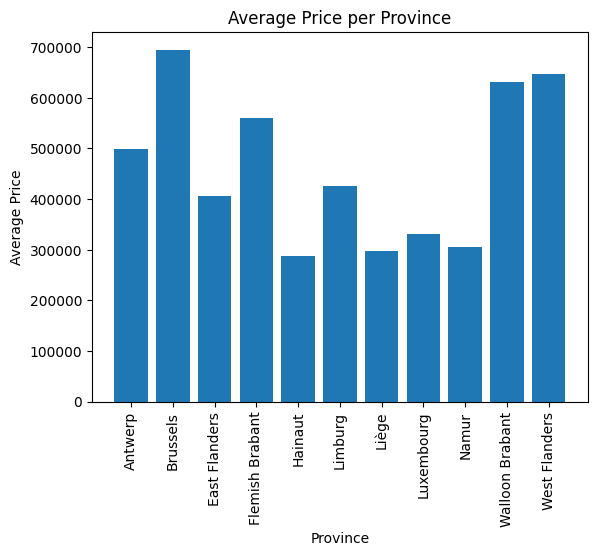

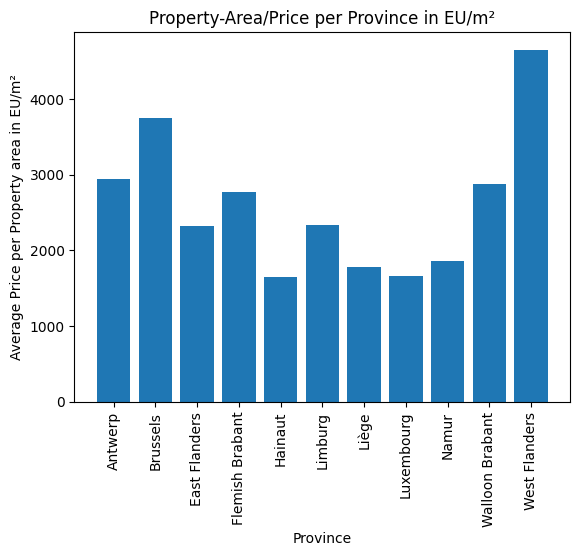

In [6]:
# plot average price per province with bar chart
plt.bar(average_price_per_province.index, average_price_per_province.values)
plt.title('Average Price per Province')
plt.xlabel('Province')
plt.ylabel('Average Price')
plt.xticks(rotation=90) # rotate x-values vertically
plt.show()

# Calculate the average price per total property area for each province
average_price_per_area = df.groupby('province')['price'].mean() / df.groupby('province')['total property area'].mean()

# plot average area price per province with bar chart
plt.bar(average_price_per_area.index, average_price_per_area)
plt.title('Property-Area/Price per Province in EU/m²')
plt.xlabel('Province')
plt.ylabel('Average Price per Property area in EU/m²')
plt.xticks(rotation=90) # rotate x-values vertically
plt.show()


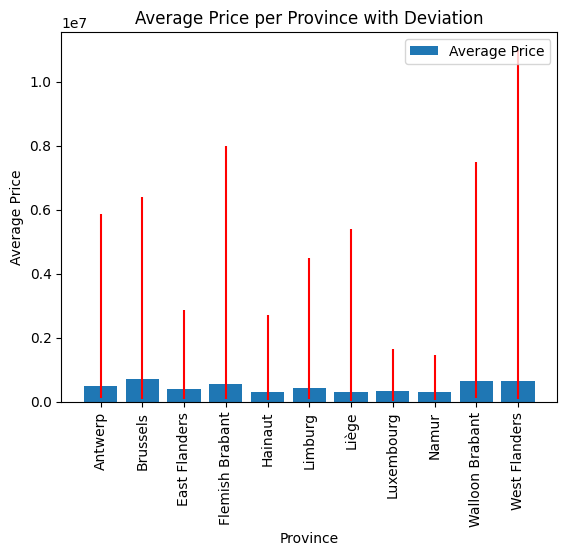

In [7]:
hist_data = []
for group_name, group_df in df.groupby('province'):
    hist, bin_edges = np.histogram(group_df['price'], bins=2)
    hist_data.append((group_name, hist, bin_edges))

average_price = df.groupby('province')['price'].mean()
plt.bar(average_price.index, average_price.values, label='Average Price')

for i, (group_name, hist, bin_edges) in enumerate(hist_data):
    lowest_bin = bin_edges[0]
    highest_bin = bin_edges[-1]
    plt.vlines(i, lowest_bin, highest_bin, colors='red')
    #plt.vlines(i, lowest_bin, highest_bin, colors='red', label='Deviation')

plt.title('Average Price per Province with Deviation')
plt.xlabel('Province')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.legend()

plt.show()

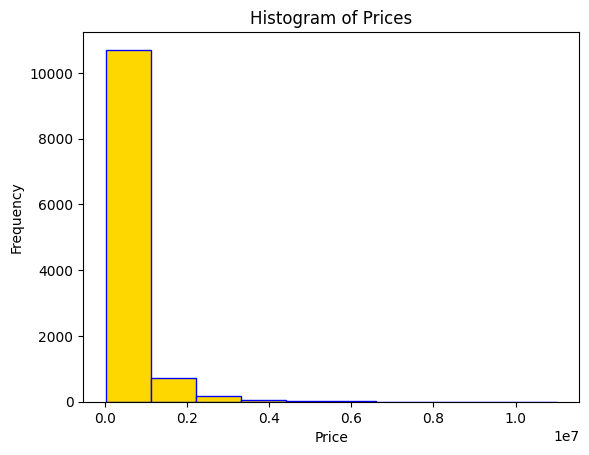

In [8]:

plt.hist(df['price'], bins=10,color='gold', edgecolor='blue')
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

In [9]:
subtypes_per_type = df.groupby('type of property')['subtype of property'].unique()
display(subtypes_per_type)

type of property
APARTMENT                                                                                          [APARTMENT, PENTHOUSE, FLAT_STUDIO, DUPLEX, LOFT, SERVICE_FLAT, GROUND_FLOOR, TRIPLEX, KOT]
HOUSE        [HOUSE, VILLA, TOWN_HOUSE, MIXED_USE_BUILDING, EXCEPTIONAL_PROPERTY, MANSION, CHALET, APARTMENT_BLOCK, COUNTRY_COTTAGE, BUNGALOW, CASTLE, MANOR_HOUSE, OTHER_PROPERTY, FARMHOUSE]
Name: subtype of property, dtype: object

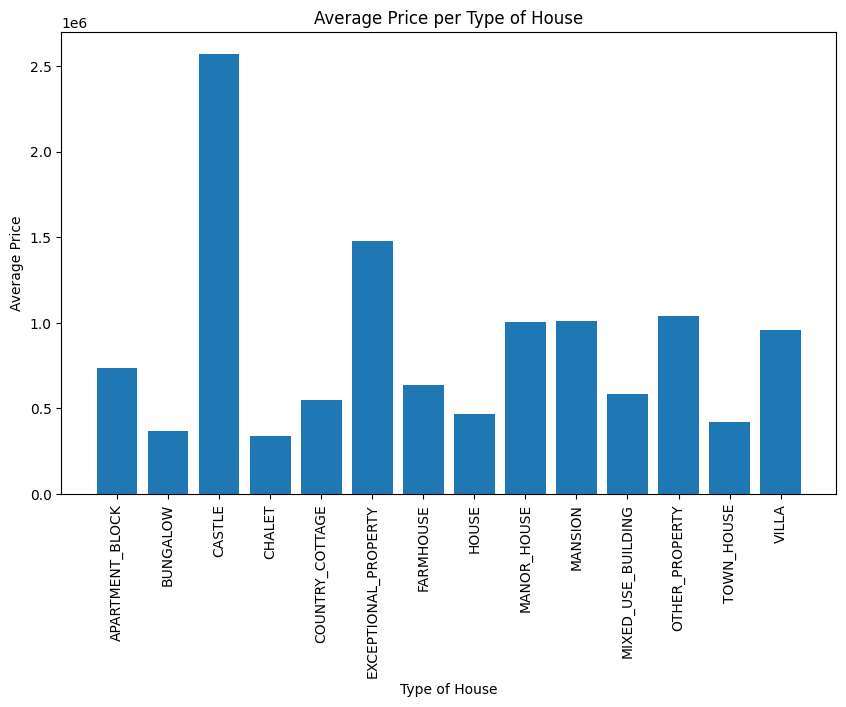

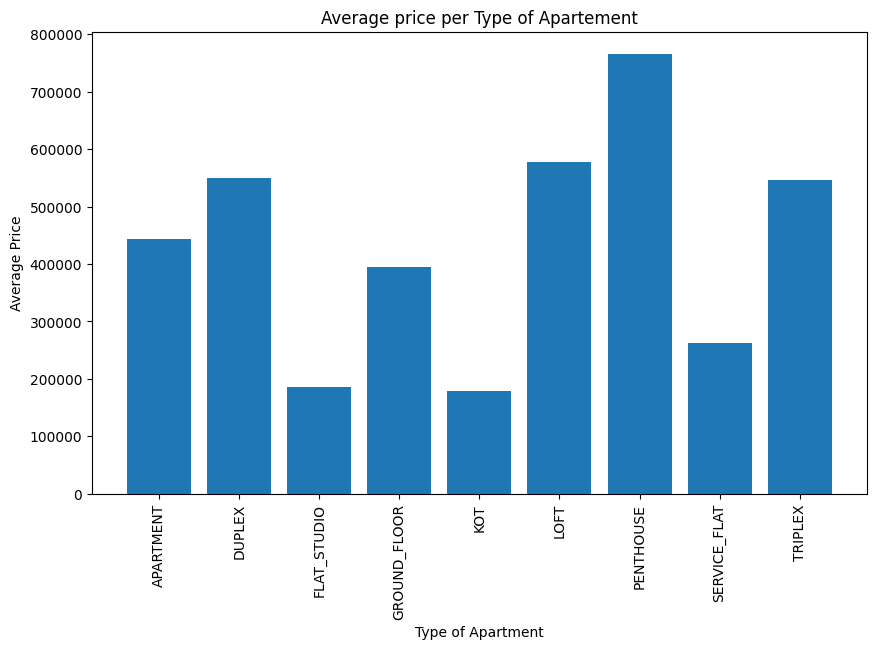

In [10]:
# Filter the DataFrame for 'HOUSE' type
house_data = df[df['type of property'] == 'HOUSE']
house_average_price = house_data.groupby('subtype of property')['price'].mean()

# Plot the average price per subtype for 'HOUSE' type
plt.figure(figsize=(10, 6))
plt.bar(house_average_price.index, house_average_price.values)
plt.title('Average Price per Type of House')
plt.xlabel('Type of House')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

# Filter the DataFrame for 'APARTMENT' type
apartment_data = df[df['type of property'] == 'APARTMENT']
apartment_average_price = apartment_data.groupby('subtype of property')['price'].mean()

# Plot the average price per subtype for 'APARTMENT' type
plt.figure(figsize=(10, 6))
plt.bar(apartment_average_price.index, apartment_average_price.values)
plt.title('Average price per Type of Apartement')
plt.xlabel('Type of Apartment')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

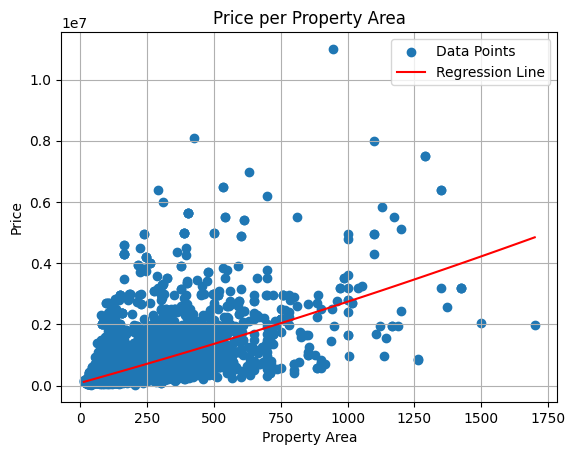

In [11]:
plt.scatter(df['total property area'], df['price'], label='Data Points')

# Polynomial regression
degree = 2  # Degree of the polynomial
coefs = np.polyfit(df['total property area'], df['price'], degree)
poly_func = np.poly1d(coefs)
x = np.linspace(df['total property area'].min(), df['total property area'].max(), 100)
y = poly_func(x)
plt.plot(x, y, color='red', label='Regression Line')

plt.xlabel('Property Area')
plt.ylabel('Price')
plt.title('Price per Property Area')
plt.grid(True)
plt.legend()
plt.show()

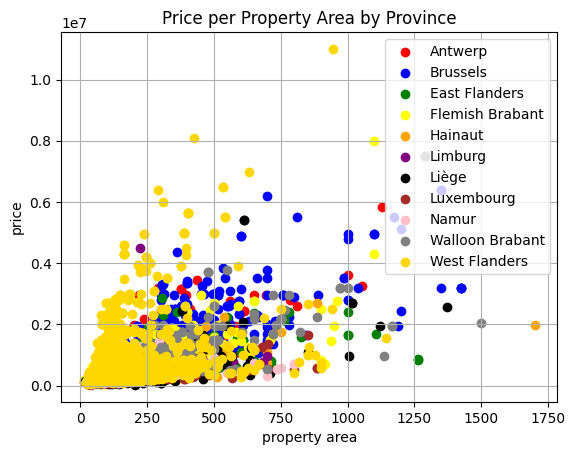

In [12]:

# Define colors for each province
province_colors = {'Antwerp': 'red', 'Brussels': 'blue', 'East Flanders': 'green', 'Flemish Brabant': 'yellow', 'Hainaut': 'orange' , 'Limburg': 'purple', 'Liège': 'black', 'Luxembourg': 'brown', 'Namur':'pink', 'Walloon Brabant':'grey', 'West Flanders': 'gold'}

# Scatter plot with different colors for each province
for province, color in province_colors.items():
    province_data = df[df['province'] == province]
    plt.scatter(province_data['total property area'], province_data['price'], color=color, label=province)

plt.xlabel('property area')
plt.ylabel('price')
plt.title('Price per Property Area by Province')
plt.legend()
plt.grid(True)
plt.show()


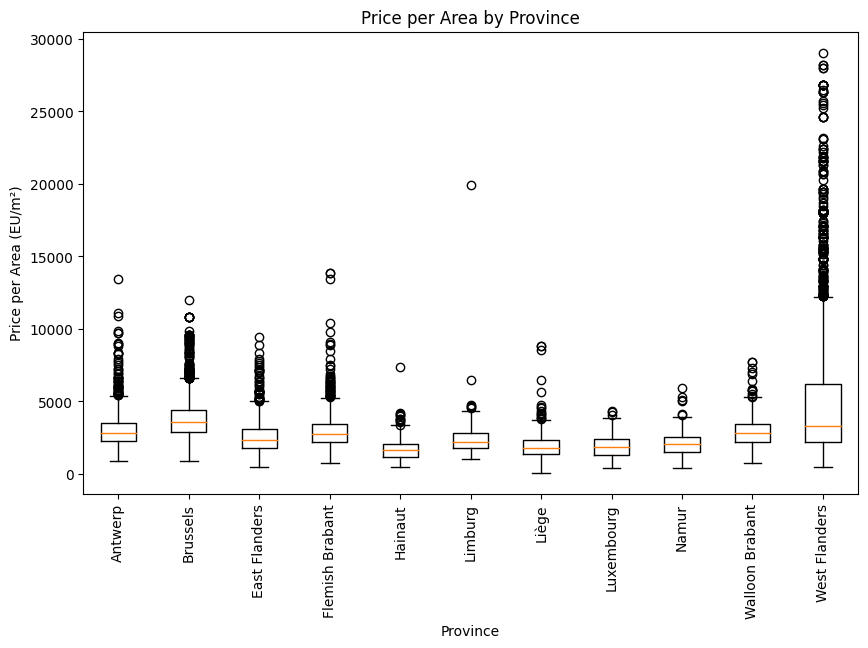

In [13]:

# Calculate the price per area for each province
df['price_per_area'] = df['price'] / df['total property area']

# Create a list to store the price_per_area values for each province
province_data = []
provinces = []

# Iterate over each province and collect the price_per_area data
for province, group in df.groupby('province'):
    province_data.append(group['price_per_area'])
    provinces.append(province)

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(province_data, labels=provinces, vert=True)
plt.title('Price per Area by Province')
plt.xlabel('Province')
plt.ylabel('Price per Area (EU/m²)')
plt.xticks(rotation=90)
plt.show()

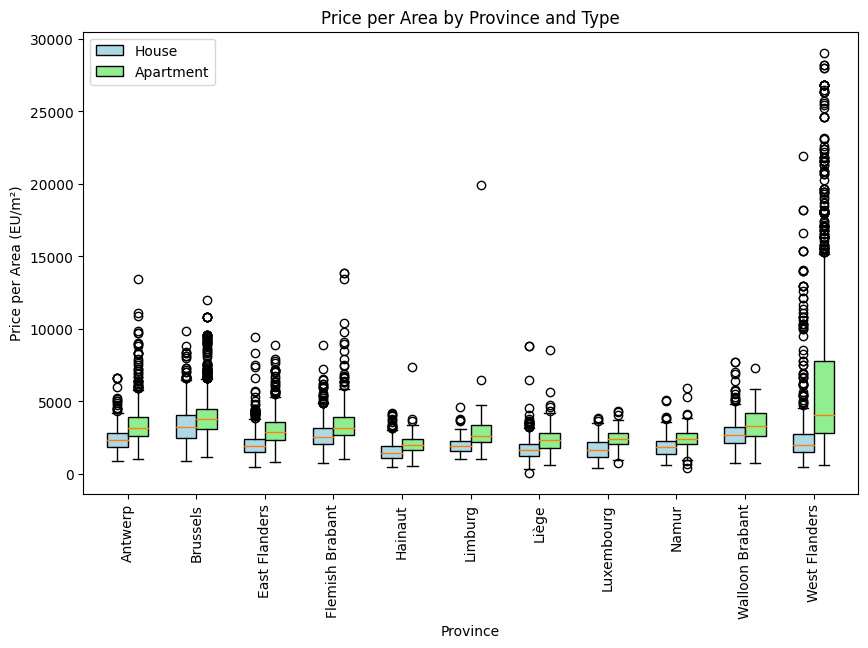

In [14]:
# Create separate province_data for each type
house_data = []
apartment_data = []

# Iterate over each province and collect the price_per_area data for each type
for province, group in df.groupby('province'):
    house_area_prices = group[group['type of property'] == 'HOUSE']['price_per_area']
    apartment_area_prices = group[group['type of property'] == 'APARTMENT']['price_per_area']
    house_data.append(house_area_prices)
    apartment_data.append(apartment_area_prices)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the boxplots for houses and apartments
house_box = ax.boxplot(house_data, positions=np.arange(len(provinces)) - 0.15, widths=0.3, patch_artist=True)
apartment_box = ax.boxplot(apartment_data, positions=np.arange(len(provinces)) + 0.15, widths=0.3, patch_artist=True)

# Set colors for the boxes
colors = ['lightblue', 'lightgreen']
for box, color in zip([house_box, apartment_box], colors):
    for patch in box['boxes']:
        patch.set_facecolor(color)

# Add labels and titles
ax.set_xticks(range(len(provinces)))
ax.set_xticklabels(provinces, rotation=90)
ax.set_title('Price per Area by Province and Type')
ax.set_xlabel('Province')
ax.set_ylabel('Price per Area (EU/m²)')

# Create a legend for the box colors
legend_patches = [mpatches.Patch(facecolor=color, edgecolor='black') for color in colors]
ax.legend(legend_patches, ['House', 'Apartment'])

plt.show()

In [15]:
highest_avg_postalCodes = df.groupby(['province', 'postalCode'])['price_per_area'].mean().groupby('province').idxmax()
lowest_avg_postalCodes = df.groupby(['province', 'postalCode'])['price_per_area'].mean().groupby('province').idxmin()

highest_postalCodes = highest_avg_postalCodes.apply(lambda x: x[1])
lowest_postalCodes = lowest_avg_postalCodes.apply(lambda x: x[1])

# Filter the DataFrame for the highest and lowest postal codes
highest_df = df[df['postalCode'].isin(highest_postalCodes)]
lowest_df = df[df['postalCode'].isin(lowest_postalCodes)]

# Retrieve the first locality for the highest and lowest postal codes
highest_localities = highest_df.groupby('postalCode')['locality'].first()
lowest_localities = lowest_df.groupby('postalCode')['locality'].first()

In [16]:
print(highest_localities)
print(lowest_localities)

postalCode
1050         Ixelles
1310        La Hulpe
1933        Zaventem
2000         Antwerp
3960            Bree
4730          Raeren
5081         Bovesse
6661      Houffalize
7804    Ath Ostiches
8300    Knokke-Heist
9831          Deurle
Name: locality, dtype: object
postalCode
1081             Koekelberg
1357               HELECINE
2235               Hulshout
3391            Tielt-Winge
3940          Hechtel-Eksel
4651                Battice
5543          Hastière Heer
6741                  Vance
7972    Beloeil Quevaucamps
8953             Wijtschate
9661                 Brakel
Name: locality, dtype: object


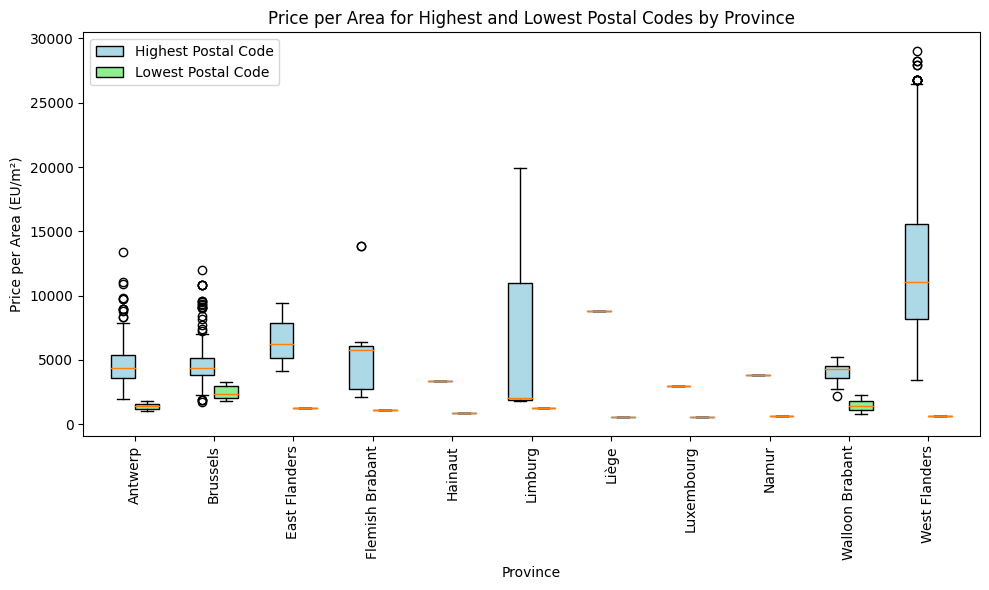

In [17]:
# Extract the price per area data for the postal codes with the highest and lowest average price per property-area for each province
highest_prices = []
lowest_prices = []

for province in provinces:
    highest_postalCode = highest_postalCodes[province]
    lowest_postalCode = lowest_postalCodes[province]
    
    highest_prices.append(df[(df['province'] == province) & (df['postalCode'] == highest_postalCode)]['price_per_area'])
    lowest_prices.append(df[(df['province'] == province) & (df['postalCode'] == lowest_postalCode)]['price_per_area'])

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the boxplots for the highest and lowest prices
highest_box = ax.boxplot(highest_prices, positions=np.arange(len(provinces)) - 0.15, widths=0.3, patch_artist=True, showfliers=True)
lowest_box = ax.boxplot(lowest_prices, positions=np.arange(len(provinces)) + 0.15, widths=0.3, patch_artist=True, showfliers=True)

# Set colors for the boxes
colors = ['lightblue', 'lightgreen']
for box, color in zip([highest_box, lowest_box], colors):
    for patch in box['boxes']:
        patch.set_facecolor(color)

# Add labels and titles
ax.set_xticks(range(len(provinces)))
ax.set_xticklabels(provinces, rotation=90)
ax.set_title('Price per Area for Highest and Lowest Postal Codes by Province')
ax.set_xlabel('Province')
ax.set_ylabel('Price per Area (EU/m²)')

# Create a legend for the box colors
legend_patches = [mpatches.Patch(facecolor=color, edgecolor='black') for color in colors]
ax.legend(legend_patches, ['Highest Postal Code', 'Lowest Postal Code'])

plt.tight_layout()
plt.show()

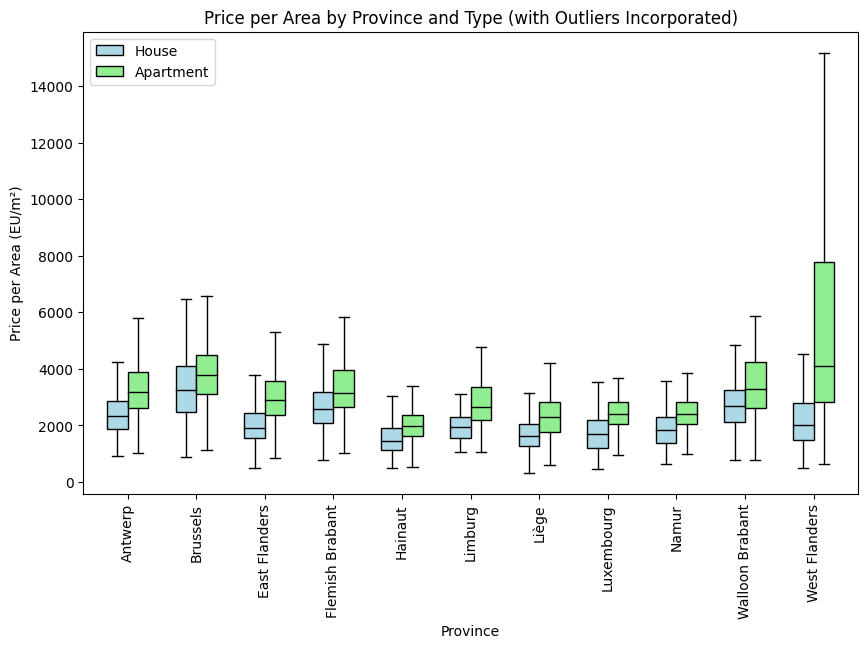

In [18]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the boxplots for houses and apartments without showing outliers separately
house_box = ax.boxplot(house_data, positions=np.arange(len(provinces)) - 0.15, widths=0.3, patch_artist=True, showfliers=False)
apartment_box = ax.boxplot(apartment_data, positions=np.arange(len(provinces)) + 0.15, widths=0.3, patch_artist=True, showfliers=False)

# Set colors for the boxes
colors = ['lightblue', 'lightgreen']
for box, color in zip([house_box, apartment_box], colors):
    for patch in box['boxes']:
        patch.set_facecolor(color)

# Add labels and titles
ax.set_xticks(range(len(provinces)))
ax.set_xticklabels(provinces, rotation=90)
ax.set_title('Price per Area by Province and Type (with Outliers Incorporated)')
ax.set_xlabel('Province')
ax.set_ylabel('Price per Area (EU/m²)')

# Create a legend for the box colors
legend_patches = [mpatches.Patch(facecolor=color, edgecolor='black') for color in colors]
ax.legend(legend_patches, ['House', 'Apartment'])

# Show the whiskers, caps, and medians for the boxes
for box in [house_box, apartment_box]:
    for whisker in box['whiskers']:
        whisker.set(color='black', linestyle='-', linewidth=1)
    for cap in box['caps']:
        cap.set(color='black', linewidth=1)
    for median in box['medians']:
        median.set(color='black', linewidth=1)

plt.show()

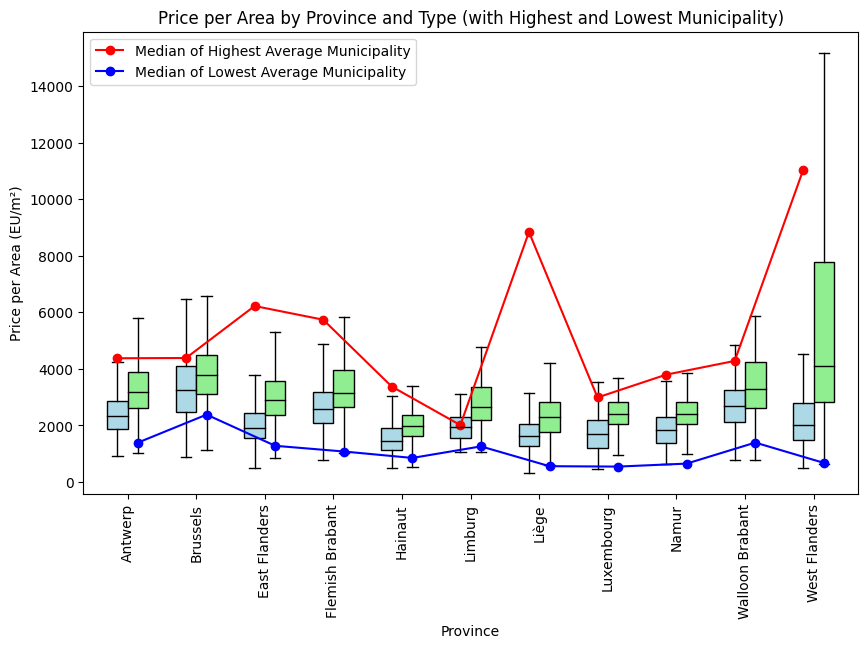

In [19]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the boxplots for houses and apartments without showing outliers separately
house_box = ax.boxplot(house_data, positions=np.arange(len(provinces)) - 0.15, widths=0.3, patch_artist=True, showfliers=False)
apartment_box = ax.boxplot(apartment_data, positions=np.arange(len(provinces)) + 0.15, widths=0.3, patch_artist=True, showfliers=False)

# Set colors for the boxes
colors = ['lightblue', 'lightgreen']
for box, color in zip([house_box, apartment_box], colors):
    for patch in box['boxes']:
        patch.set_facecolor(color)

# Add labels and titles
ax.set_xticks(range(len(provinces)))
ax.set_xticklabels(provinces, rotation=90)
ax.set_title('Price per Area by Province and Type (with Highest and Lowest Municipality)')
ax.set_xlabel('Province')
ax.set_ylabel('Price per Area (EU/m²)')

# Create a legend for the box colors
legend_patches = [mpatches.Patch(facecolor=color, edgecolor='black') for color in colors]
ax.legend(legend_patches, ['House', 'Apartment'])

# Show the whiskers, caps, and medians for the boxes
for box in [house_box, apartment_box]:
    for whisker in box['whiskers']:
        whisker.set(color='black', linestyle='-', linewidth=1)
    for cap in box['caps']:
        cap.set(color='black', linewidth=1)
    for median in box['medians']:
        median.set(color='black', linewidth=1)

# Calculate the median of the highest and lowest postal codes
median_highest = [np.median(data) for data in highest_prices]
median_lowest = [np.median(data) for data in lowest_prices]

# Plot the median lines for highest and lowest
ax.plot(np.arange(len(provinces)) - 0.15, median_highest, marker='o', linestyle='-', color='red', label='Median of Highest Average Municipality')
ax.plot(np.arange(len(provinces)) + 0.15, median_lowest, marker='o', linestyle='-', color='blue', label='Median of Lowest Average Municipality')

#legend_patches = [mpatches.Patch(facecolor=color, edgecolor='black') for color in colors]
#ax.legend(legend_patches, ['House', 'Apartment'])

# Plot legend
ax.legend()

plt.show()

In [20]:
df

,id,postalCode,province,locality,type of property,subtype of property,type of sale,state of the building,number of facades,number of bedrooms,fully equipped kitchen,furnished,open fire,terrace,garden,swimming pool,terrace area,garden area,living area,total property area,total land area,price,price_per_area
0,10679324,4100,Liège,Seraing,HOUSE,HOUSE,residential_sale,just_renovated,2,3,installed,0,0,1,1,0,64,106,14,87,145,159000,1827.586207
1,10679325,4600,Liège,Vise,HOUSE,HOUSE,residential_sale,good,3,3,installed,0,0,1,0,0,136,0,19,145,184,229000,1579.310345
2,10679351,1800,Flemish Brabant,Vilvoorde,HOUSE,VILLA,residential_sale,good,3,3,semi_equipped,0,0,1,1,0,40,400,17,132,623,430000,3257.575758
3,10679090,9700,East Flanders,Oudenaarde,HOUSE,HOUSE,residential_sale,as_new,4,2,hyper_equipped,0,0,1,1,0,25,420,21,161,680,439000,2726.708075
4,10678835,1700,Flemish Brabant,Dilbeek,HOUSE,HOUSE,residential_sale,to_renovate,3,4,installed,0,0,1,0,0,0,0,29,315,8002,529000,1679.365079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11989,10619309,7500,Hainaut,Tournai,APARTMENT,APARTMENT,residential_sale,good,2,2,installed,0,0,0,1,0,0,80,0,97,0,129000,1329.896907
11990,10588563,4100,Liège,Seraing,APARTMENT,APARTMENT,residential_sale,to_be_done_up,2,2,semi_equipped,0,0,1,0,0,8,0,0,73,0,134000,1835.616438
11991,9812376,7080,Hainaut,Frameries,APARTMENT,APARTMENT,residential_sale,0,2,1,0,0,1,0,0,0,0,0,0,251,0,135000,537.848606
11992,10273588,3770,Limburg,Riemst,APARTMENT,APARTMENT,residential_sale,good,3,1,0,0,0,1,0,0,0,0,0,58,0,139000,2396.551724
